In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [71]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [73]:
data.isna().sum()
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [74]:
#sns.pairplot(data, hue='Species')

In [75]:
# Generamos el DataFrame que utilizaremos unicamente con 2 variables más la variable a predecir
column1 = "PetalWidthCm"
column2 = "PetalLengthCm"
data_2variables = data[[column1, column2, "Species"]]
data_2variables.head(3)

,PetalWidthCm,PetalLengthCm,Species
0,0.2,1.4,Iris-setosa
1,0.2,1.4,Iris-setosa
2,0.2,1.3,Iris-setosa


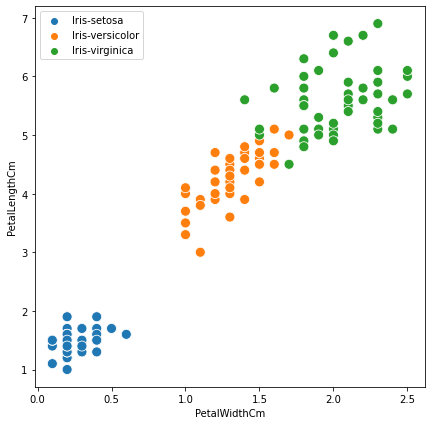

In [76]:
# Visualizamos los datos

plt.figure(figsize = (7,7))
sns.scatterplot(data = data_2variables, x = column1, y = column2,  hue=data_2variables["Species"].to_list(), s=100)

In [77]:
# Generamos X e y

X = data_2variables.drop(columns = "Species")   #variables predictora
y = data_2variables["Species"]   #variable a predecir

In [78]:
# Dividimos datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)  #por default 25% de test

In [79]:
# Importamos el modelo que utilizaremos. KNN: 

from sklearn.neighbors import KNeighborsClassifier

In [80]:
modelo = KNeighborsClassifier()
modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred = modelo.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_test,y_pred)
matriz_confusion

array([[17,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]])

Text(33.0, 0.5, 'Reales')

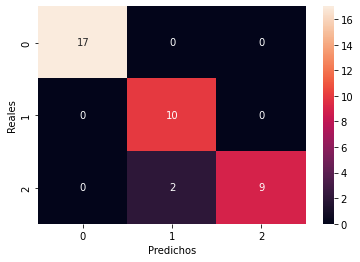

In [83]:
sns.heatmap(matriz_confusion, annot=True)
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [84]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
acc

0.9473684210526315